In [4]:
import jieba
import pandas as pd

In [47]:
# 停用词表加载方法
def get_stopword_list():
    # 停用词表存储路径，每一行为一个词，按行读取进行加载
    # 进行编码转换确保匹配准确率
    stop_word_path = 'stopword.txt'
    stopword_list = [sw.replace('\n', '') for sw in open(stop_word_path,encoding='utf-8').readlines()]
    return stopword_list

# 分词方法，调用结巴接口
def seg_to_list(sentence, pos=False):
    if not pos:
        # 不进行词性标注的分词方法
        seg_list = jieba.cut(sentence)
    else:
        # 进行词性标注的分词方法
        seg_list = psg.cut(sentence)
    return seg_list

# 去除干扰词
def word_filter(seg_list, pos=False):
    stopword_list = get_stopword_list()
    filter_list = []
    # 根据POS参数选择是否词性过滤
    ## 不进行词性过滤，则将词性都标记为n，表示全部保留
    for seg in seg_list:
        if not pos:
            word = seg
            flag = 'n'
        else:
            word = seg.word
            flag = seg.flag
        if not flag.startswith('n'):
            continue
        # 过滤停用词表中的词，以及长度为<2的词
        if not word in stopword_list and len(word) > 1:
            filter_list.append(word)
    return filter_list


In [5]:

filename="美的（Midea）JSQ22-L1(Y)_comment_正面.csv"
df=pd.read_csv(filename,encoding="utf-8")
df

,comment
0,外形外观外观漂亮安装服务师傅很专业耐心服务恒温效果合适耗能情况目前看不出来出水速度很匀速
1,外观看上去挺好的大品牌就是不一样只是颜色像是白色的不是很耐脏如果可以选颜色就更完美了今天下午...
2,之前的美的机用了将近10年机型也不生产了所以要修换的配件也没有了所以在京东还是选择了美的还是...
3,外形外观美观大方是喜欢的类型和款式恒温效果出热水快温度适宜非常满意不错安装服务安装师傅服务态...
4,送货到家满意电话预约安装满意安装师傅很热心速度快态度好满意产品外观漂亮轻薄满意使用方便快速出...
...,...
881,刚安装还没有用总体感觉还不错
882,新机器新技术还是新的好师傅也很细心完美
883,安装师傅很负责很好实惠
884,优惠价格购买的美的好歹也是大牌子了这个价位还行问我就喜欢打开水龙头直接有热水虽然还要等一会但...


In [48]:
textlist=df.loc[:]['comment'].values
textlist
text="".join(textlist)
text=seg_to_list(text)
text=word_filter(text)
text=" ".join(text)
text

'外形 外观 外观 漂亮 安装 服务 师傅 专业 耐心 服务 恒温 效果 合适 耗能 情况 目前 看不出来 出水 速度 匀速 外观 看上去 品牌 颜色 像是 白色 耐脏 颜色 完美 今天下午 到货 打电话 安装 师傅 很快 过来 安装 安装 师傅 耐心 安装 调试 到位 特别 京东 购物 之前 美的 机用 将近 10 机型 生产 修换 配件 没有 京东 选择 美的 比较 信任 美的 客服 安装 师傅 热情 负责 安装 之后 认真 讲解 打开 声响 真的 之前 声音 小太 多出 热水 速度 很快 满意 外形 外观 美观大方 喜欢 类型 款式 恒温 效果 热水 温度 适宜 满意 不错 安装 服务 安装 师傅 服务态度 噪音 大小 噪音 不大 送货到 满意 电话 预约 安装 满意 安装 师傅 热心 速度 态度 满意 产品 外观 漂亮 轻薄 满意 使用方便 快速 热水 满意 价格 优惠 性价比 超级 产品质量 外观 不错 值得 选购 服务态度 到位 安装工 干净 麻利 总体 超值 搬新家 东西 电器 一律 挑选 今年 最新款 型号 全网 搜索 一下 各大 品牌 燃气 热水器 美的 一款 几乎 第一 一直 首选 位置 最终 不作 二选 直接 拿下 预约 周六 配送 安装 京东 一如既往 既定 时间 货品 送达 安装 服务商 提前 一天 已经 联系 安装时间 师傅 当天 上午 再次 电话 落实 环节 紧凑 值得 大赞 拆箱 银色 热水器 眼前 唯一 一点点 不太 满意 厚度 国产品牌 能象 国外品牌 厚度 控制 10 12 公分 更加 漂亮 帅气 师傅 看来 熟手 技工 不消 半小时 机器 装好 试用 确实 买家 所言 这台 机器 超级 静音 几乎 感觉 不到 运作 热水 供应 很快 淋浴间 花洒 试水 大概 10 热水 流出 总体 京东 电器 优惠 不断 惊喜 不断 满意 不断 灰色 洋气 材质 感觉 质量 挺不错 触屏 操控 便捷 安装 师傅 特地 告诉 水温 之后 试用 恒温 效果 特别 省气 厨房 卫生间 一起 热水 问题 满意 一次 购物 下单 发货 物流 挺快 售后服务 安装 师傅 工作 认真负责 安装 耐心 解答 工作 一直 保持 微笑 热水器 噪音 出水量 温度 恒温 效果 师傅 安装 及时 到位 外观 很大 燃气 效果 愉快 一次 采购 外形 外观 美观大方 

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

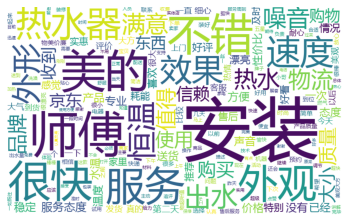

In [56]:
wc = WordCloud(width=800,collocations=False, height=500, background_color="white", max_words=200,font_path="./yahei_mono.ttf")
wc.generate(text)
plt.axis("off")
plt.imshow(wc)